<div style="display:float">
  <h1 style="margin-top: 36px; font-size: 32px; float:left">Pytorch Basics</h1>
  <img style="vertical-align:middle; float:right" src="http://gntlearning.com/wp-content/uploads/2021/05/Small_Logo-278x64.jpg" width=250px>
</div>

Data:
https://www.kaggle.com/uciml/pima-indians-diabetes-database

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F

In [2]:
df = pd.read_csv('diabetes.csv')
display(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(array([227.,   0.,   0.,   2.,   2.,  11.,  18.,  20.,  20.,  38.,  23.,
         38.,  28.,  39.,  37.,  46.,  51.,  23.,  30.,  25.,  31.,  17.,
         11.,  12.,   7.,   4.,   2.,   2.,   1.,   0.,   1.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 0.  ,  1.98,  3.96,  5.94,  7.92,  9.9 , 11.88, 13.86, 15.84,
        17.82, 19.8 , 21.78, 23.76, 25.74, 27.72, 29.7 , 31.68, 33.66,
        35.64, 37.62, 39.6 , 41.58, 43.56, 45.54, 47.52, 49.5 , 51.48,
        53.46, 55.44, 57.42, 59.4 , 61.38, 63.36, 65.34, 67.32, 69.3 ,
        71.28, 73.26, 75.24, 77.22, 79.2 , 81.18, 83.16, 85.14, 87.12,
        89.1 , 91.08, 93.06, 95.04, 97.02, 99.  ]),
 <a list of 50 Patch objects>)

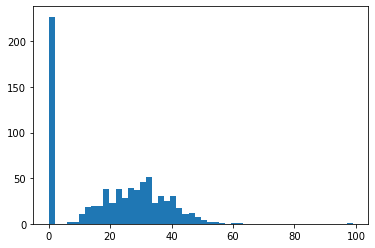

In [4]:
plt.hist(df['SkinThickness'], bins=50)

(array([377.,   8.,  29.,  38.,  35.,  38.,  32.,  38.,  22.,  25.,  24.,
         17.,  13.,  10.,   6.,   5.,  10.,   5.,   3.,   7.,   1.,   2.,
          2.,   2.,   1.,   0.,   1.,   1.,   5.,   2.,   1.,   1.,   2.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0.  ,  16.92,  33.84,  50.76,  67.68,  84.6 , 101.52, 118.44,
        135.36, 152.28, 169.2 , 186.12, 203.04, 219.96, 236.88, 253.8 ,
        270.72, 287.64, 304.56, 321.48, 338.4 , 355.32, 372.24, 389.16,
        406.08, 423.  , 439.92, 456.84, 473.76, 490.68, 507.6 , 524.52,
        541.44, 558.36, 575.28, 592.2 , 609.12, 626.04, 642.96, 659.88,
        676.8 , 693.72, 710.64, 727.56, 744.48, 761.4 , 778.32, 795.24,
        812.16, 829.08, 846.  ]),
 <a list of 50 Patch objects>)

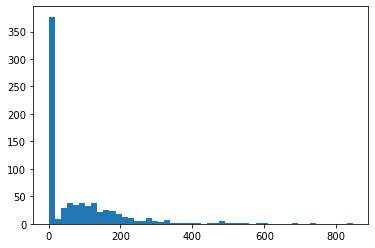

In [5]:
plt.hist(df['Insulin'], bins=50)

In [6]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values.reshape(-1,1)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Converting Data into Pytorch DataLoader

In [8]:
x_train = torch.Tensor(x_train)
y_train = torch.Tensor(y_train)
x_test = torch.Tensor(x_test)
y_test = torch.Tensor(y_test)

In [9]:
train_dataset = TensorDataset(x_train,y_train)
test_dataset = TensorDataset(x_test,y_test)

In [10]:
train_dataloader = DataLoader(train_dataset, batch_size=32)
test_dataloader = DataLoader(test_dataset, batch_size=32)

## Define a Model

In [11]:
# class OurModelClassName (torch.nn.Module):
#     def __init__(self):
#         super().__init__()
        
#     def forward(self, x):
#         return x

In [12]:
class NN_1hidden(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = torch.nn.Linear(8, 16)
        self.fc2 = torch.nn.Linear(16, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

In [13]:
model = NN_1hidden()
criterion = torch.nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)

## Train a Model

In [14]:
history_test = []
history_train = []
for epoch in range(20):
    # Train on Training data
    total_loss = 0
    correct = 0
    total = 0
    for data in train_dataloader:
        x, y = data
        optimizer.zero_grad()

        outputs = model(x)
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
        correct += ((outputs>0) == (y==1)).sum().item()
        total += len(y)
    history_train.append(correct/total)
    
    # Accuracy of Test
    correct = 0
    total = 0
    with torch.no_grad():
        for i, data in enumerate(test_dataloader):
            x, y = data
            outputs = model(x)
            correct += ((outputs>0) == (y==1)).sum().item()
            total += len(y)
    history_test.append(correct/total)
    
    print(total_loss/len(train_dataloader))

0.6683255664326928
0.6259494234215129
0.5854612534696405
0.5449761247093027
0.5324463343078439
0.5064886564558203
0.498024658723311
0.4894783239472996
0.4884717721830715
0.4772789559581063
0.47998617454008624
0.471396727995439
0.46883335980502044
0.4683977270668203
0.4673408175056631
0.46215770054947247
0.4600978981364857
0.45828372781926935
0.45779628916220233
0.4557042975317348


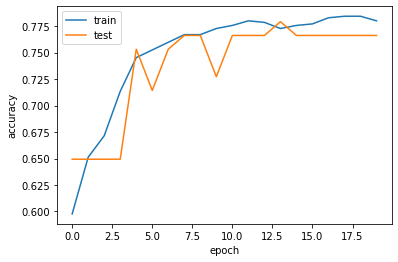

In [15]:
plt.plot(history_train, label='train')
plt.plot(history_test, label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()